In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib import parse
import pandas as pd
import numpy as np
import xlrd
import re
from openpyxl import Workbook
from collections import Counter
import tensorflow as tf
import sklearn
import hanja
from konlpy.tag import Okt, Hannanum, Kkma, Komoran
from soynlp.word import WordExtractor
from soynlp.noun import LRNounExtractor
from soynlp.tokenizer import LTokenizer
from wordcloud import WordCloud

from nltk import Text
import hanja
from hanja import hangul
import time
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from functools import partial
import logging
from gensim.models import word2vec
import gensim
import gensim.models as g
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# matplot 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [6]:
data = pd.read_excel('tokenization.xlsx')
text = data['Hannanum'].copy()

In [19]:
preData =pd.read_excel('preprocessing_data_af_rm_kw.xlsx')

In [20]:
sentences = preData['sentence']

# Tf-idf

In [8]:
# min_df: Document Frequency의 최소 빈도값을 설정해주는 파라미터, DF는 특정 단어가 나타내는 문서의 수를 의미, 해당 값보다 작은 DF
#         를 가진 단어는 단어 사전에서 제외
# analyzer: 학습단위(word, char)를 결정하는 파라미터
# sublinear_tf: Term Frequency값의 스무딩 여부를 결정하는 파라미터, 높은 TF값을 완만하게 처리
# ngram_range: 단어 묶음의 범위 설정
# max_features: tf-idf vector의 최대 feature를 설정해주는 파라미터, 여기서 feature는 테이블의 칼럼 또는 행렬의 열
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 5000)
X = tfidf_vectorizer.fit_transform(text)

In [9]:
embeddingData = pd.DataFrame(X, columns = ['Tf-idf'])

In [10]:
embeddingData.head()

,Tf-idf
0,"(0, 4814)\t0.07156217844028313\n (0, 1779)\..."
1,"(0, 4482)\t0.08067255371579922\n (0, 2275)\..."
2,"(0, 4314)\t0.10977830531580887\n (0, 2403)\..."
3,"(0, 2128)\t0.07413376772722222\n (0, 2127)\..."
4,"(0, 2015)\t0.10889709164907657\n (0, 3218)\..."


In [11]:
embeddingData.shape

(90141, 1)

In [12]:
embeddingData.to_excel("Embedding.xlsx")

In [3]:
df = pd.read_excel('Embedding.xlsx', index_col = 0)
df.head(15)

,Tf-idf
0,"(0, 4814)\t0.07156217844028313\n (0, 1779)\..."
1,"(0, 4482)\t0.08067255371579922\n (0, 2275)\..."
2,"(0, 4314)\t0.10977830531580887\n (0, 2403)\..."
3,"(0, 2128)\t0.07413376772722222\n (0, 2127)\..."
4,"(0, 2015)\t0.10889709164907657\n (0, 3218)\..."
5,"(0, 4790)\t0.07465050373256242\n (0, 2201)\..."
6,"(0, 2268)\t0.07880684692712481\n (0, 1456)\..."
7,"(0, 991)\t0.13987538931872526\n (0, 3219)\t..."
8,"(0, 3075)\t0.10252535489502985\n (0, 3287)\..."
9,"(0, 2824)\t0.09244377381679166\n (0, 3805)\..."


In [13]:
vocabData = tfidf_vectorizer.vocabulary_
vocabData

{'대법원': 1223,
 '문건': 1518,
 '무단': 1497,
 '유출': 3154,
 '혐의': 4768,
 '1심': 83,
 '검찰': 491,
 '번복': 1687,
 '수용': 2527,
 '재직': 3573,
 '시절': 2610,
 '재판': 3574,
 '기록': 971,
 '자료': 3491,
 '반출': 1623,
 '13일': 41,
 '오전': 2949,
 '서울': 2190,
 '서초구': 2237,
 '서울중앙지방법원': 2226,
 '직권남용': 4031,
 '권리행사방해': 892,
 '선고': 2262,
 '공판': 712,
 '출석': 4275,
 '법원': 1739,
 '기소': 981,
 '변호사': 1775,
 '항소심': 4668,
 '한계': 4621,
 '이탈': 3335,
 '판결': 4474,
 '비판': 1992,
 '서울고법': 2208,
 '형사5부': 4864,
 '부장판사': 1886,
 '8일': 331,
 '진행': 4066,
 '이날': 3243,
 '구체적': 823,
 '항소': 4666,
 '이유': 3308,
 '법원행정처': 1747,
 '차장': 4101,
 '파일': 4471,
 '이름': 3261,
 '기재': 1011,
 '사람': 2022,
 '저장': 3613,
 '증거들': 3964,
 '공소사실': 676,
 '인정': 3394,
 '일방적': 3424,
 '진술': 4055,
 '관여': 758,
 '사실': 2045,
 '지시': 4005,
 '당시': 1191,
 '박모': 1589,
 '사안': 2050,
 '작성': 3530,
 '설명': 2359,
 '심리': 2693,
 '증인': 3973,
 '신청': 2654,
 '사법': 2038,
 '지원': 4011,
 '관련해': 751,
 '일반적': 3423,
 '직무': 4035,
 '권한': 896,
 '공정성': 699,
 '국민': 852,
 '신뢰': 2630,
 '심각': 2690,
 '훼손': 4

In [14]:
frequency = vocabData.values()

In [15]:
print(frequency)

dict_values([1223, 1518, 1497, 3154, 4768, 83, 491, 1687, 2527, 3573, 2610, 3574, 971, 3491, 1623, 41, 2949, 2190, 2237, 2226, 4031, 892, 2262, 712, 4275, 1739, 981, 1775, 4668, 4621, 3335, 4474, 1992, 2208, 4864, 1886, 331, 4066, 3243, 823, 4666, 3308, 1747, 4101, 4471, 3261, 1011, 2022, 3613, 3964, 676, 3394, 3424, 4055, 758, 2045, 4005, 1191, 1589, 2050, 3530, 2359, 2693, 3973, 2654, 2038, 4011, 751, 3423, 4035, 896, 699, 852, 2630, 2690, 4980, 3142, 4485, 3909, 753, 1724, 3065, 453, 1777, 441, 186, 1154, 35, 2960, 288, 1768, 2940, 1330, 2520, 930, 517, 3192, 4938, 2501, 2607, 4460, 1998, 3640, 4179, 3772, 656, 658, 4690, 4036, 4294, 2125, 3155, 4769, 492, 4813, 2955, 2194, 2239, 4032, 88, 2277, 715, 4784, 4671, 713, 99, 2214, 679, 3395, 2046, 2360, 853, 3148, 3911, 754, 1725, 1778, 3070, 100, 3147, 36, 2967, 512, 503, 2505, 3575, 4826, 4692, 2956, 2196, 4770, 89, 2278, 755, 1779, 4814, 1467, 2427, 636, 4971, 485, 2392, 3382, 1956, 1735, 3980, 165, 4462, 276, 2040, 4918, 360, 1183, 

In [27]:
sortedDict = sorted(vocabData.items(), key = lambda x: x[1])
for i in sortedDict:
    print(i[0], i[1])

가게 0
가격 1
가까이 2
가능성 3
가능성 매우 4
가능성 배제 5
가담 6
가담 정도 7
가담 혐의 8
가량 9
가로 10
가로 혐의 11
가로 혐의 기소 12
가맹 13
가방 14
가사 15
가사 도우미 16
가상 17
가석방 18
가수 19
가스 20
가슴 21
가습기 22
가습기 살균제 23
가운데 24
가입 25
가장 26
가정 27
가정폭력 28
가족 29
가중 30
가중 처벌 31
가중 처벌 뇌물 32
가중 처벌 배임 33
가중 처벌 법률 34
가중 처벌 사기 35
가중 처벌 알선 36
가중 처벌 횡령 37
가지 38
가짜 39
가출 40
가치 41
가해 42
가해자 43
가혹 44
가혹 행위 45
각각 46
각각 구형 47
각각 벌금 48
각각 벌금 선고 49
각각 선고 50
각각 선고 재판 51
각각 징역 52
각각 징역 개월 53
각각 징역 구형 54
각각 징역 선고 55
각각 징역 집행유예 56
각각 징역 징역 57
각종 58
간부 59
간음 60
간의 61
간접 62
간첩 63
간첩 사건 64
간호사 65
갈등 66
감경 67
감금 68
감금 혐의 69
감독 70
감사 71
감사원 72
감시 73
감안 74
감염 75
감염병 76
감염증 77
감염증 코로나 78
감옥 79
감정 80
감정 결과 81
감찰 82
감형 83
갑자기 84
강간 85
강간 혐의 86
강간 혐의 기소 87
강남 88
강남구 89
강도 90
강도 살인 91
강력 92
강릉 93
강사 94
강서구 95
강압 96
강요 97
강요 혐의 98
강원 99
강원도 100
강원랜드 101
강의 102
강의 수강 103
강의 수강 명령 104
강제 105
강제 추행 106
강제 추행 혐의 107
강제추행 108
강제추행 혐의 109
강제추행 혐의 기소 110
강조 111
강화 112
개발 113
개발 사업 114
개별 115
개선 116
개설 117
개시 118
개월 119
개월 구형 120
개월 동안 121
개월 벌금 122
개월 선고 123
개월 선고 재판 124
개월 실

사문서 위조 1860
사물 1861
사물 변별 1862
사범 1863
사법 1864
사법 위반 1865
사법 위반 혐의 1866
사법부 1867
사법연수원 1868
사비 1869
사상 1870
사생활 1871
사실 1872
사실 공표 1873
사실 공표 혐의 1874
사실 대해 1875
사실 모두 1876
사실 모두 유죄 1877
사실 모두 인정 1878
사실 부인 1879
사실 오인 1880
사실 유죄 1881
사실 유죄 인정 1882
사실 유포 1883
사실 유포 혐의 1884
사실 인정 1885
사실 주장 1886
사실 확인 1887
사실관계 1888
사실혼 1889
사안 1890
사업 1891
사업 관련 1892
사업 추진 1893
사업가 1894
사업자 1895
사용 1896
사용 혐의 1897
사용 혐의 기소 1898
사용자 1899
사위 1900
사유 1901
사의 1902
사이 1903
사이버 1904
사이트 1905
사인 1906
사장 1907
사장 징역 1908
사적 1909
사전 1910
사전 선거운동 1911
사전 선거운동 혐의 1912
사정 1913
사정 고려 1914
사정 종합 1915
사죄 1916
사주 1917
사직 1918
사진 1919
사찰 1920
사채 1921
사체 1922
사체 유기 1923
사칭 1924
사태 1925
사퇴 1926
사항 1927
사형 1928
사형 구형 1929
사형 선고 1930
사회 1931
사회 격리 1932
사회 로부터 1933
사회 물의 1934
사회 봉사 1935
사회 봉사 명령 1936
사회 봉사 선고 1937
사회 신뢰 1938
사후 1939
삭제 1940
산시 1941
산업 1942
산업 은행 1943
산정 1944
살균제 1945
살인 1946
살인 고의 1947
살인 기소 1948
살인 미수 1949
살인 미수 혐의 1950
살인 사건 1951
살인 사체 1952
살인 혐의 1953
살인 혐의 기소 1954
살인죄 1955
살해 1956
살해 범행 1957
살해 시신 1958
살해 혐

종업원 3637
종전 3638
종합 3639
종합 고려 3640
종합 원심 3641
종합 피고인 3642
죄질 3643
죄질 극히 3644
죄질 다만 3645
죄질 매우 3646
죄질 면서 3647
죄질 범행 3648
죄질 실형 3649
죄질 지적 3650
죄질 피해자 3651
죄책 3652
주가 3653
주가조작 3654
주간 3655
주거 3656
주거지 3657
주거침입 3658
주기 3659
주도 3660
주로 3661
주먹 3662
주목 3663
주문 3664
주민 3665
주변 3666
주부 3667
주사 3668
주소 3669
주식 3670
주식 투자 3671
주심 3672
주요 3673
주유소 3674
주의 3675
주의 상해 3676
주의 상해 혐의 3677
주의 의무 3678
주의 한계 3679
주인 3680
주자 3681
주장 3682
주장 검찰 3683
주장 대해 3684
주장 법원 3685
주장 재판 3686
주점 3687
주제 3688
주주 3689
주지 3690
주차 3691
주차장 3692
주체 3693
주최 3694
주택 3695
죽음 3696
준강간 3697
준법 3698
준비 3699
준비 기일 3700
준수 3701
중간 3702
중개 3703
중공업 3704
중구 3705
중국 3706
중국인 3707
중단 3708
중대 3709
중독 3710
중상 3711
중소기업 3712
중순 3713
중심 3714
중앙 3715
중앙 지방법원 3716
중요 3717
중이 3718
중인 3719
중하 3720
중학교 3721
중형 3722
중형 구형 3723
중형 선고 3724
중형 선고 서울 3725
즉각 3726
즉각 항소 3727
즉시 3728
증가 3729
증거 3730
증거 무죄 3731
증거 무죄 선고 3732
증거 부족 3733
증거 사실 3734
증거 판단 3735
증거 피고인 3736
증거능력 3737
증거능력 인정 3738
증권 3739
증권사 3740
증명 3741
증명 경우 3742
증명 경우 해당 3743
증명 

In [16]:
vocabData.items()

dict_items([('대법원', 1223), ('문건', 1518), ('무단', 1497), ('유출', 3154), ('혐의', 4768), ('1심', 83), ('검찰', 491), ('번복', 1687), ('수용', 2527), ('재직', 3573), ('시절', 2610), ('재판', 3574), ('기록', 971), ('자료', 3491), ('반출', 1623), ('13일', 41), ('오전', 2949), ('서울', 2190), ('서초구', 2237), ('서울중앙지방법원', 2226), ('직권남용', 4031), ('권리행사방해', 892), ('선고', 2262), ('공판', 712), ('출석', 4275), ('법원', 1739), ('기소', 981), ('변호사', 1775), ('항소심', 4668), ('한계', 4621), ('이탈', 3335), ('판결', 4474), ('비판', 1992), ('서울고법', 2208), ('형사5부', 4864), ('부장판사', 1886), ('8일', 331), ('진행', 4066), ('이날', 3243), ('구체적', 823), ('항소', 4666), ('이유', 3308), ('법원행정처', 1747), ('차장', 4101), ('파일', 4471), ('이름', 3261), ('기재', 1011), ('사람', 2022), ('저장', 3613), ('증거들', 3964), ('공소사실', 676), ('인정', 3394), ('일방적', 3424), ('진술', 4055), ('관여', 758), ('사실', 2045), ('지시', 4005), ('당시', 1191), ('박모', 1589), ('사안', 2050), ('작성', 3530), ('설명', 2359), ('심리', 2693), ('증인', 3973), ('신청', 2654), ('사법', 2038), ('지원', 4011), ('관련해', 751), ('일반적', 3423), ('직

In [38]:
sorted(vocabData.items(), key = lambda x: x[1], reverse = True)

[('희생', 4999),
 ('희망', 4998),
 ('흡입', 4997),
 ('흡연', 4996),
 ('흔적', 4995),
 ('흉기 혐의', 4994),
 ('흉기 차례 살해', 4993),
 ('흉기 차례', 4992),
 ('흉기 위협', 4991),
 ('흉기 살해 혐의', 4990),
 ('흉기 살해', 4989),
 ('흉기', 4988),
 ('휴대폰', 4987),
 ('휴대전화', 4986),
 ('휴대', 4985),
 ('휴가', 4984),
 ('휘발유', 4983),
 ('훼손 혐의 기소', 4982),
 ('훼손 혐의', 4981),
 ('훼손', 4980),
 ('훈련', 4979),
 ('후회', 4978),
 ('후원', 4977),
 ('후보자', 4976),
 ('후보 지지', 4975),
 ('후보', 4974),
 ('후배', 4973),
 ('효성', 4972),
 ('효력', 4971),
 ('효과', 4970),
 ('횡령죄', 4969),
 ('횡령 혐의 재판', 4968),
 ('횡령 혐의 기소', 4967),
 ('횡령 혐의', 4966),
 ('횡령 배임 혐의', 4965),
 ('횡령 배임', 4964),
 ('횡령 기소', 4963),
 ('횡령', 4962),
 ('횟수', 4961),
 ('회피', 4960),
 ('회장 혐의', 4959),
 ('회장 징역 선고', 4958),
 ('회장 징역', 4957),
 ('회장 지난', 4956),
 ('회장 대해', 4955),
 ('회장 대한', 4954),
 ('회장', 4953),
 ('회의', 4952),
 ('회유', 4951),
 ('회원', 4950),
 ('회식', 4949),
 ('회수', 4948),
 ('회생', 4947),
 ('회삿돈 횡령', 4946),
 ('회삿돈', 4945),
 ('회사원', 4944),
 ('회사 직원', 4943),
 ('회사 자금', 4942),
 ('회사 대표', 4941),
 ('회사', 49

# Dataset 분리: training set, validation set, test set

In [21]:
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(57689, 5000)
(57689,)
(18029, 5000)
(18029,)
(14423, 5000)
(14423,)


In [23]:
np.save('X_trainingset_tf', X_train)
np.save('X_testset_tf', X_test)
np.save('X_validationset_tf', X_val)
np.save('y_trainingset_tf', y_train)
np.save('y_testset_tf', y_test)
np.save('y_validationset_tf', y_val)

In [31]:
d = pd.DataFrame(vocabData.items(), columns = ['word','count'])

In [32]:
d

,word,count
0,대법원,940
1,문건,1302
2,무단,1259
3,유출,2966
4,혐의,4737
...,...,...
4995,명령 재판 판결,1197
4996,계모,288
4997,살해 혐의 구속기소,1960
4998,징역 구형 서울중앙지법,3964


AttributeError: 'Line2D' object has no property 'order'

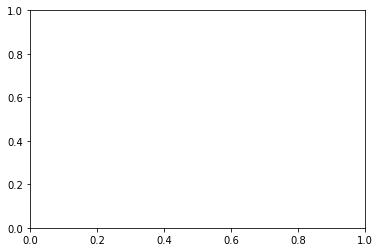

In [35]:
sns.kdeplot(d['count'], order = d['count'].value_counts().index)
plt.show()

In [6]:
vocab = pd.DataFrame(data = list(vocabData.items()), columns = ['vocabulary', 'count'])

In [39]:
plt.figure(figsize = (15, 10))
plt.hist(vocabData, bins = 50)
plt.yscale('log', nonposy = 'clip')
plt.xlabel("Number of words", fontsize = 15)
plt.ylabel("Number fo news", fontsize = 15)

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number fo news')

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54589 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54856 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50865 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44263 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50756 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47100 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49912 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\

Error in callback <function flush_figures at 0x000001BF0423BF78> (for post_execute):


KeyboardInterrupt: 

# Word2vec

size: 워드 벡터 특징값 수, 각 단어에 대해 임베딩된 벡터의 차원을 정함<br>
min_count: 단어에 대한 최소 빈도 수, 모델에 의미 있는 단어를 가지고 학습하기 위해 적은 빈도 수의 단어들은 학습하지 않음<br>
workers: 프로세스 개수, 모델 학습 시 학습을 위한 프로세스 개수를 지정<br>
window: 컨텍스트 윈도 크기, word2vec을 수행하기 위한 컨텍스트 윈도 크기 지정<br>
sample: 다운 샘플링 비율, word2vec 학습을 수행할 때 빠른 학습을 위해 정답 단어 라벨에 대한 다운샘플링 비율을 지정, 보통 0.001이 좋은 성능을 낸다고 함<br>

In [70]:
data = pd.read_excel("tokenization.xlsx", index_col = 0)
text = data['Hannanum'].copy()

In [71]:
for i, t in enumerate(text):
    text[i] = str(t)

In [72]:
texts = list(text)
textWord2v = []
for t in texts:
    textWord2v.append(t.split())

In [88]:
textWord2v[0]

['대법원',
 '문건',
 '무단',
 '유출',
 '혐의',
 '등',
 '1심',
 '인정증거',
 '범죄고의',
 '검찰',
 '1심',
 '임종헌',
 '번복',
 '술',
 '수용',
 '대법원',
 '재판연구관',
 '재직',
 '시절',
 '재판',
 '기록',
 '등',
 '자료',
 '무단',
 '반출',
 '혐의',
 '등',
 '재판',
 '유해용',
 '전',
 '대법원',
 '수석재판연구관',
 '13일',
 '오전',
 '서울',
 '서초구',
 '서울중앙지방법원',
 '직권남용',
 '권리행사방해',
 '등',
 '혐의',
 '1심',
 '선고',
 '공판',
 '출석',
 '법원',
 '대법원',
 '재판연구관',
 '재직',
 '시절',
 '재판',
 '기록',
 '등',
 '자료',
 '무단',
 '반출',
 '혐의',
 '등',
 '기소',
 '유해용',
 '변호사',
 '항소심',
 '첫',
 '공판',
 '검찰',
 '유',
 '변호사',
 '사법행정권',
 '한계',
 '이탈',
 '며',
 '1심',
 '판결',
 '작심',
 '비판',
 '서울고법',
 '형사5부',
 '부장판사',
 '윤강열',
 '8일',
 '직권남용',
 '권리행사방해',
 '등',
 '혐의',
 '기소',
 '유',
 '변호사',
 '항소심',
 '첫',
 '공판',
 '진행',
 '이날',
 '검찰',
 '프레젠테이션',
 '을',
 '구체적',
 '항소',
 '이유',
 '검찰',
 '임종헌',
 '전',
 '법원행정처',
 '차장',
 '문건',
 '파일',
 '유',
 '변호사',
 '이름',
 '기재',
 '전',
 '차장',
 '파일',
 '사람',
 '이름',
 '저장',
 '며',
 '증거들',
 '공소사실',
 '인정',
 '1심',
 '전',
 '차장',
 '번복',
 '술',
 '일방적',
 '수용',
 '말',
 '이',
 '전',
 '차장',
 '번복',
 '술',
 '유',
 '변호사',
 '문건',
 '송부받은',


In [24]:
# 학습 진행 상황 확인
logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

In [223]:
print("Training model")
model = word2vec.Word2Vec(textWord2v, workers = 4, size = 1000, min_count = 40, window = 10, sample = 1e-3)

2020-11-06 18:33:05,728 : INFO : collecting all words and their counts
2020-11-06 18:33:05,730 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model


2020-11-06 18:33:06,783 : INFO : PROGRESS: at sentence #10000, processed 1559950 words, keeping 64255 word types
2020-11-06 18:33:07,658 : INFO : PROGRESS: at sentence #20000, processed 2825794 words, keeping 96325 word types
2020-11-06 18:33:07,870 : INFO : collected 105439 word types from a corpus of 3107331 raw words and 22618 sentences
2020-11-06 18:33:07,871 : INFO : Loading a fresh vocabulary
2020-11-06 18:33:08,095 : INFO : effective_min_count=40 retains 6409 unique words (6% of original 105439, drops 99030)
2020-11-06 18:33:08,097 : INFO : effective_min_count=40 leaves 2706650 word corpus (87% of original 3107331, drops 400681)
2020-11-06 18:33:08,185 : INFO : deleting the raw counts dictionary of 105439 items
2020-11-06 18:33:08,191 : INFO : sample=0.001 downsamples 46 most-common words
2020-11-06 18:33:08,193 : INFO : downsampling leaves estimated 2308647 word corpus (85.3% of prior 2706650)
2020-11-06 18:33:08,261 : INFO : estimated required memory for 6409 words and 1000 di

2020-11-06 18:34:00,938 : INFO : EPOCH 5 - PROGRESS: at 89.39% examples, 231962 words/s, in_qsize 8, out_qsize 0
2020-11-06 18:34:01,639 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-11-06 18:34:01,665 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-11-06 18:34:01,688 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-11-06 18:34:01,695 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-11-06 18:34:01,697 : INFO : EPOCH - 5 : training on 3107331 raw words (2309088 effective words) took 9.9s, 232589 effective words/s
2020-11-06 18:34:01,698 : INFO : training on a 15536655 raw words (11542625 effective words) took 49.2s, 234612 effective words/s


In [222]:
print("Training model")
model = word2vec.Word2Vec(textWord2v, workers = 4, size = 10000, min_count = 40, window = 10, sample = 1e-3)

2020-11-06 18:28:37,141 : INFO : collecting all words and their counts
2020-11-06 18:28:37,143 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model


2020-11-06 18:28:37,907 : INFO : PROGRESS: at sentence #10000, processed 1559950 words, keeping 64255 word types
2020-11-06 18:28:38,639 : INFO : PROGRESS: at sentence #20000, processed 2825794 words, keeping 96325 word types
2020-11-06 18:28:38,771 : INFO : collected 105439 word types from a corpus of 3107331 raw words and 22618 sentences
2020-11-06 18:28:38,775 : INFO : Loading a fresh vocabulary
2020-11-06 18:28:39,014 : INFO : effective_min_count=40 retains 6409 unique words (6% of original 105439, drops 99030)
2020-11-06 18:28:39,018 : INFO : effective_min_count=40 leaves 2706650 word corpus (87% of original 3107331, drops 400681)
2020-11-06 18:28:39,098 : INFO : deleting the raw counts dictionary of 105439 items
2020-11-06 18:28:39,103 : INFO : sample=0.001 downsamples 46 most-common words
2020-11-06 18:28:39,105 : INFO : downsampling leaves estimated 2308647 word corpus (85.3% of prior 2706650)
2020-11-06 18:28:39,156 : INFO : estimated required memory for 6409 words and 10000 d

2020-11-06 18:30:21,930 : INFO : EPOCH 1 - PROGRESS: at 74.30% examples, 18464 words/s, in_qsize 7, out_qsize 0
2020-11-06 18:30:22,961 : INFO : EPOCH 1 - PROGRESS: at 75.55% examples, 18491 words/s, in_qsize 8, out_qsize 0
2020-11-06 18:30:24,062 : INFO : EPOCH 1 - PROGRESS: at 76.39% examples, 18433 words/s, in_qsize 7, out_qsize 0
2020-11-06 18:30:25,496 : INFO : EPOCH 1 - PROGRESS: at 77.92% examples, 18455 words/s, in_qsize 8, out_qsize 0
2020-11-06 18:30:27,008 : INFO : EPOCH 1 - PROGRESS: at 78.95% examples, 18466 words/s, in_qsize 7, out_qsize 0
2020-11-06 18:30:28,511 : INFO : EPOCH 1 - PROGRESS: at 80.02% examples, 18474 words/s, in_qsize 7, out_qsize 0
2020-11-06 18:30:29,995 : INFO : EPOCH 1 - PROGRESS: at 81.23% examples, 18484 words/s, in_qsize 7, out_qsize 0
2020-11-06 18:30:31,430 : INFO : EPOCH 1 - PROGRESS: at 82.47% examples, 18506 words/s, in_qsize 7, out_qsize 0
2020-11-06 18:30:33,006 : INFO : EPOCH 1 - PROGRESS: at 83.72% examples, 18500 words/s, in_qsize 7, out_

2020-11-06 18:32:01,349 : INFO : EPOCH 2 - PROGRESS: at 52.53% examples, 18865 words/s, in_qsize 7, out_qsize 0
2020-11-06 18:32:02,626 : INFO : EPOCH 2 - PROGRESS: at 53.45% examples, 18841 words/s, in_qsize 7, out_qsize 0
2020-11-06 18:32:03,766 : INFO : EPOCH 2 - PROGRESS: at 54.41% examples, 18851 words/s, in_qsize 8, out_qsize 0
2020-11-06 18:32:04,819 : INFO : EPOCH 2 - PROGRESS: at 55.45% examples, 18879 words/s, in_qsize 7, out_qsize 0
2020-11-06 18:32:06,078 : INFO : EPOCH 2 - PROGRESS: at 56.50% examples, 18859 words/s, in_qsize 8, out_qsize 0
2020-11-06 18:32:07,332 : INFO : EPOCH 2 - PROGRESS: at 57.41% examples, 18839 words/s, in_qsize 7, out_qsize 0
2020-11-06 18:32:08,490 : INFO : EPOCH 2 - PROGRESS: at 58.48% examples, 18841 words/s, in_qsize 7, out_qsize 0
2020-11-06 18:32:09,736 : INFO : EPOCH 2 - PROGRESS: at 59.65% examples, 18827 words/s, in_qsize 7, out_qsize 0
2020-11-06 18:32:10,793 : INFO : EPOCH 2 - PROGRESS: at 60.72% examples, 18854 words/s, in_qsize 7, out_

KeyboardInterrupt: 

In [99]:
print("Training model")
model = word2vec.Word2Vec(textWord2v, workers = 4, size = 300, min_count = 40, window = 10, sample = 1e-3)

2020-11-06 12:04:07,558 : INFO : collecting all words and their counts
2020-11-06 12:04:07,560 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model


2020-11-06 12:04:07,854 : INFO : PROGRESS: at sentence #10000, processed 1559950 words, keeping 64255 word types
2020-11-06 12:04:08,073 : INFO : PROGRESS: at sentence #20000, processed 2825794 words, keeping 96325 word types
2020-11-06 12:04:08,130 : INFO : collected 105439 word types from a corpus of 3107331 raw words and 22618 sentences
2020-11-06 12:04:08,131 : INFO : Loading a fresh vocabulary
2020-11-06 12:04:08,182 : INFO : effective_min_count=40 retains 6409 unique words (6% of original 105439, drops 99030)
2020-11-06 12:04:08,183 : INFO : effective_min_count=40 leaves 2706650 word corpus (87% of original 3107331, drops 400681)
2020-11-06 12:04:08,211 : INFO : deleting the raw counts dictionary of 105439 items
2020-11-06 12:04:08,214 : INFO : sample=0.001 downsamples 46 most-common words
2020-11-06 12:04:08,215 : INFO : downsampling leaves estimated 2308647 word corpus (85.3% of prior 2706650)
2020-11-06 12:04:08,240 : INFO : estimated required memory for 6409 words and 300 dim

In [232]:
print("Training model")
model = word2vec.Word2Vec(textWord2v, workers = 4, size = 600, min_count = 40, window = 10, sample = 1e-3)

2020-11-06 18:39:39,220 : INFO : collecting all words and their counts
2020-11-06 18:39:39,222 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model


2020-11-06 18:39:39,952 : INFO : PROGRESS: at sentence #10000, processed 1559950 words, keeping 64255 word types
2020-11-06 18:39:40,639 : INFO : PROGRESS: at sentence #20000, processed 2825794 words, keeping 96325 word types
2020-11-06 18:39:40,874 : INFO : collected 105439 word types from a corpus of 3107331 raw words and 22618 sentences
2020-11-06 18:39:40,876 : INFO : Loading a fresh vocabulary
2020-11-06 18:39:41,141 : INFO : effective_min_count=40 retains 6409 unique words (6% of original 105439, drops 99030)
2020-11-06 18:39:41,144 : INFO : effective_min_count=40 leaves 2706650 word corpus (87% of original 3107331, drops 400681)
2020-11-06 18:39:41,244 : INFO : deleting the raw counts dictionary of 105439 items
2020-11-06 18:39:41,252 : INFO : sample=0.001 downsamples 46 most-common words
2020-11-06 18:39:41,255 : INFO : downsampling leaves estimated 2308647 word corpus (85.3% of prior 2706650)
2020-11-06 18:39:41,314 : INFO : estimated required memory for 6409 words and 600 dim

# features = 400

In [243]:
print("Training model")
model = word2vec.Word2Vec(textWord2v, workers = 4, size = 400, min_count = 40, window = 10, sample = 1e-3)

2020-11-06 18:45:55,605 : INFO : collecting all words and their counts
2020-11-06 18:45:55,606 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model


2020-11-06 18:45:56,569 : INFO : PROGRESS: at sentence #10000, processed 1559950 words, keeping 64255 word types
2020-11-06 18:45:57,417 : INFO : PROGRESS: at sentence #20000, processed 2825794 words, keeping 96325 word types
2020-11-06 18:45:57,631 : INFO : collected 105439 word types from a corpus of 3107331 raw words and 22618 sentences
2020-11-06 18:45:57,634 : INFO : Loading a fresh vocabulary
2020-11-06 18:45:57,816 : INFO : effective_min_count=40 retains 6409 unique words (6% of original 105439, drops 99030)
2020-11-06 18:45:57,819 : INFO : effective_min_count=40 leaves 2706650 word corpus (87% of original 3107331, drops 400681)
2020-11-06 18:45:57,924 : INFO : deleting the raw counts dictionary of 105439 items
2020-11-06 18:45:57,930 : INFO : sample=0.001 downsamples 46 most-common words
2020-11-06 18:45:57,933 : INFO : downsampling leaves estimated 2308647 word corpus (85.3% of prior 2706650)
2020-11-06 18:45:58,007 : INFO : estimated required memory for 6409 words and 400 dim

In [244]:
model_name = "400features_40minwords_10window"
model.save(model_name)

2020-11-06 18:46:58,812 : INFO : saving Word2Vec object under 400features_40minwords_10window, separately None
2020-11-06 18:46:58,815 : INFO : not storing attribute vectors_norm
2020-11-06 18:46:58,817 : INFO : not storing attribute cum_table
2020-11-06 18:46:59,315 : INFO : saved 400features_40minwords_10window


In [245]:
print(model.wv.vectors.shape)

(6409, 400)


In [246]:
model.wv.most_similar("성폭행")

2020-11-06 18:47:12,654 : INFO : precomputing L2-norms of word weight vectors


[('성폭행한', 0.7891016006469727),
 ('강제추행', 0.7710980176925659),
 ('성추행', 0.7696630954742432),
 ('성관계', 0.7692680358886719),
 ('강간', 0.7574225664138794),
 ('미성년자', 0.7521937489509583),
 ('여중생', 0.7385435700416565),
 ('성추행한', 0.7277573347091675),
 ('강간치상', 0.7159876823425293),
 ('성폭행해', 0.6967656016349792)]

In [247]:
model.wv.most_similar("강도")

[('물건', 0.6546332836151123),
 ('손괴', 0.6361231803894043),
 ('범행도구', 0.6275979280471802),
 ('반항', 0.6252980828285217),
 ('무차별적', 0.6244471669197083),
 ('절단', 0.6190882921218872),
 ('칼', 0.6171786785125732),
 ('강취', 0.6162593364715576),
 ('준비해', 0.6103965044021606),
 ('엽기적', 0.6080502271652222)]

In [250]:
test_data_vecs4 = GetDataset(textWord2v ,model, 400)

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [251]:
np.save('Embedding_Word2Vec4', test_data_vecs4)

In [252]:
X = test_data_vecs4
y = np.array(preData['y'])

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [253]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(14475, 400)
(4524, 400)
(14475,)
(4524,)
(3619, 400)
(3619,)


In [255]:
np.save('X_trainingset5', X_train)
np.save('X_testset5', X_test)
np.save('X_validationset5', X_val)
np.save('y_trainingset5', y_train)
np.save('y_testset5', y_test)
np.save('y_validationset5', y_val)

# features = 350

In [ ]:
data = pd.read_excel("tokenization.xlsx", index_col = 0)
text = data['Hannanum'].copy()

In [72]:
texts = list(text)
textWord2v = []
for t in texts:
    textWord2v.append(t.split())

KeyboardInterrupt: 

In [27]:
print("Training model")
model = word2vec.Word2Vec(textWord2v, workers = 4, size = 350, min_count = 40, window = 10, sample = 1e-3)

2020-11-20 01:47:10,170 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-11-20 01:47:10,173 : INFO : collecting all words and their counts
2020-11-20 01:47:10,174 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model


2020-11-20 01:47:10,541 : INFO : PROGRESS: at sentence #10000, processed 1576086 words, keeping 65443 word types
2020-11-20 01:47:10,816 : INFO : PROGRESS: at sentence #20000, processed 2843452 words, keeping 98237 word types
2020-11-20 01:47:11,172 : INFO : PROGRESS: at sentence #30000, processed 4654415 words, keeping 144571 word types
2020-11-20 01:47:11,526 : INFO : PROGRESS: at sentence #40000, processed 6353145 words, keeping 178773 word types
2020-11-20 01:47:11,936 : INFO : PROGRESS: at sentence #50000, processed 7750380 words, keeping 239577 word types
2020-11-20 01:47:12,307 : INFO : PROGRESS: at sentence #60000, processed 9454305 words, keeping 248455 word types
2020-11-20 01:47:12,690 : INFO : PROGRESS: at sentence #70000, processed 11332681 words, keeping 259861 word types
2020-11-20 01:47:13,148 : INFO : PROGRESS: at sentence #80000, processed 13345317 words, keeping 301173 word types
2020-11-20 01:47:13,580 : INFO : PROGRESS: at sentence #90000, processed 15179724 words,

2020-11-20 01:48:07,786 : INFO : EPOCH 3 - PROGRESS: at 23.65% examples, 622222 words/s, in_qsize 8, out_qsize 0
2020-11-20 01:48:08,794 : INFO : EPOCH 3 - PROGRESS: at 27.68% examples, 603908 words/s, in_qsize 7, out_qsize 0
2020-11-20 01:48:09,813 : INFO : EPOCH 3 - PROGRESS: at 31.39% examples, 601667 words/s, in_qsize 8, out_qsize 0
2020-11-20 01:48:10,823 : INFO : EPOCH 3 - PROGRESS: at 35.83% examples, 605664 words/s, in_qsize 7, out_qsize 0
2020-11-20 01:48:11,835 : INFO : EPOCH 3 - PROGRESS: at 39.96% examples, 596667 words/s, in_qsize 8, out_qsize 0
2020-11-20 01:48:12,842 : INFO : EPOCH 3 - PROGRESS: at 44.34% examples, 592351 words/s, in_qsize 8, out_qsize 0
2020-11-20 01:48:13,844 : INFO : EPOCH 3 - PROGRESS: at 49.45% examples, 586472 words/s, in_qsize 7, out_qsize 0
2020-11-20 01:48:14,860 : INFO : EPOCH 3 - PROGRESS: at 55.55% examples, 582451 words/s, in_qsize 8, out_qsize 0
2020-11-20 01:48:15,862 : INFO : EPOCH 3 - PROGRESS: at 59.93% examples, 583756 words/s, in_qsiz

In [28]:
model_name = "350features_40minwords_10window"
model.save(model_name)

2020-11-20 01:49:07,257 : INFO : saving Word2Vec object under 350features_40minwords_10window, separately None
2020-11-20 01:49:07,259 : INFO : not storing attribute vectors_norm
2020-11-20 01:49:07,260 : INFO : not storing attribute cum_table
2020-11-20 01:49:08,153 : INFO : saved 350features_40minwords_10window


In [29]:
print(model.wv.vectors.shape)

(22172, 350)


In [30]:
model.wv.most_similar("성폭행")

2020-11-20 01:49:08,174 : INFO : precomputing L2-norms of word weight vectors


[('성폭행한', 0.692692756652832),
 ('강간', 0.6078109741210938),
 ('성폭행해', 0.6075605750083923),
 ('성폭행했다', 0.606101393699646),
 ('성폭행하', 0.5758394002914429),
 ('성추행', 0.5455700159072876),
 ('성폭행하거', 0.5427847504615784),
 ('강제추행', 0.5392664670944214),
 ('여중생', 0.5345345735549927),
 ('강간치상', 0.5266553163528442)]

In [31]:
model.wv.most_similar("강도")

[('무자비', 0.5733752250671387),
 ('프라이팬', 0.5072811245918274),
 ('무차별적', 0.500016450881958),
 ('폭력성', 0.4897451400756836),
 ('도구', 0.4671206474304199),
 ('범행방법', 0.4581317901611328),
 ('반항', 0.457963764667511),
 ('안면', 0.4550308585166931),
 ('약탈', 0.4534054100513458),
 ('칼', 0.44767680764198303)]

In [39]:
test_data_vecs5 = GetDataset(textWord2v ,model, 350)

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [40]:
np.save('Embedding_Word2Vec5', test_data_vecs5)

In [42]:
X = test_data_vecs5
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(57689, 350)
(18029, 350)
(57689,)
(18029,)
(14423, 350)
(14423,)


In [45]:
np.save('X_trainingset_w2v', X_train)
np.save('X_testset_w2v', X_test)
np.save('X_validationset_w2v', X_val)
np.save('y_trainingset_w2v', y_train)
np.save('y_testset_w2v', y_test)
np.save('y_validationset_w2v', y_val)

In [46]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [219]:
# 학습 완료 후 필요없는 메모리 unload
model.init_sims(replace=True)

2020-11-06 18:27:40,032 : INFO : precomputing L2-norms of word weight vectors


In [220]:
model_name = "1000features_40minwords_10window"
model.save(model_name)

2020-11-06 18:27:40,092 : INFO : saving Word2Vec object under 1000features_40minwords_10window, separately None
2020-11-06 18:27:40,096 : INFO : not storing attribute vectors_norm
2020-11-06 18:27:40,097 : INFO : not storing attribute cum_table
2020-11-06 18:27:41,273 : INFO : saved 1000features_40minwords_10window


In [221]:
print(model.wv.vectors.shape)

(6409, 1000)


In [101]:
model_name = "300features_40minwords_10window"
model.save(model_name)

2020-11-06 12:04:24,436 : INFO : saving Word2Vec object under 300features_40minwords_10window, separately None
2020-11-06 12:04:24,437 : INFO : not storing attribute vectors_norm
2020-11-06 12:04:24,438 : INFO : not storing attribute cum_table
2020-11-06 12:04:24,638 : INFO : saved 300features_40minwords_10window


In [102]:
print(model.wv.vectors.shape)

(6409, 300)


In [233]:
model_name = "600features_40minwords_10window"
model.save(model_name)

2020-11-06 18:40:45,338 : INFO : saving Word2Vec object under 600features_40minwords_10window, separately None
2020-11-06 18:40:45,340 : INFO : not storing attribute vectors_norm
2020-11-06 18:40:45,342 : INFO : not storing attribute cum_table
2020-11-06 18:40:46,145 : INFO : saved 600features_40minwords_10window


In [234]:
print(model.wv.vectors.shape)

(6409, 600)


# features = 1000

In [91]:
model.wv.most_similar("성폭행")

[('성폭행한', 0.797505259513855),
 ('성추행', 0.7888409495353699),
 ('여중생', 0.7877191305160522),
 ('강제추행', 0.7830733060836792),
 ('성관계', 0.7722152471542358),
 ('강간', 0.7681630253791809),
 ('미성년자', 0.7427222728729248),
 ('성폭행했다', 0.719328761100769),
 ('초등학생', 0.7148675918579102),
 ('성추행한', 0.7100855112075806)]

In [93]:
model.wv.most_similar("강도")

[('도구', 0.6762779951095581),
 ('폭력성', 0.6449813842773438),
 ('범행도구', 0.6280196905136108),
 ('손괴', 0.617472767829895),
 ('반항', 0.6147516965866089),
 ('물색', 0.6117392182350159),
 ('준비해', 0.6106626987457275),
 ('칼', 0.6088826656341553),
 ('물건', 0.6088110208511353),
 ('위험한', 0.6029081344604492)]

# features = 300

In [103]:
model.wv.most_similar("성폭행")

[('성폭행한', 0.7938230633735657),
 ('성추행', 0.7934578657150269),
 ('강제추행', 0.7820974588394165),
 ('여중생', 0.7800466418266296),
 ('성관계', 0.7667811512947083),
 ('강간', 0.7613246440887451),
 ('미성년자', 0.7521031498908997),
 ('성폭행해', 0.7296403646469116),
 ('성추행한', 0.7290769815444946),
 ('유사강간', 0.7223882079124451)]

In [104]:
model.wv.most_similar("강도")

[('손괴', 0.6569596529006958),
 ('도구', 0.6323081254959106),
 ('물건', 0.6303577423095703),
 ('대담', 0.6251406073570251),
 ('위험한', 0.6166383028030396),
 ('잔인', 0.6162197589874268),
 ('무차별적', 0.6147623658180237),
 ('미수', 0.6079027652740479),
 ('휴대', 0.6025568246841431),
 ('흔적', 0.5992097854614258)]

# features = 600

In [235]:
model.wv.most_similar("성폭행")

2020-11-06 18:41:09,928 : INFO : precomputing L2-norms of word weight vectors


[('성추행', 0.7907220721244812),
 ('성폭행한', 0.7883868217468262),
 ('강제추행', 0.7734884023666382),
 ('여중생', 0.7715673446655273),
 ('성관계', 0.7696500420570374),
 ('강간', 0.7599580883979797),
 ('미성년자', 0.7585386633872986),
 ('성추행한', 0.7160309553146362),
 ('성폭행했다', 0.7079052329063416),
 ('미성년', 0.6892594695091248)]

In [236]:
model.wv.most_similar("강도")

[('범행도구', 0.6746046543121338),
 ('휴대', 0.670219898223877),
 ('물건', 0.6656252145767212),
 ('도구', 0.6614068746566772),
 ('위험한', 0.6527402400970459),
 ('엽기적', 0.6468339562416077),
 ('손괴', 0.6431899070739746),
 ('반항', 0.6428085565567017),
 ('무차별적', 0.6283413767814636),
 ('주거', 0.6212612390518188)]

In [107]:
mpl.rcParams['axes.unicode_minus'] = False
model_name = "300features_40minwords_10window"
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components = 2)

X_tsne = tsne.fit_transform(X[:100, :])

2020-11-06 12:08:09,787 : INFO : loading Doc2Vec object from 300features_40minwords_10window
2020-11-06 12:08:09,937 : INFO : loading wv recursively from 300features_40minwords_10window.wv.* with mmap=None
2020-11-06 12:08:09,938 : INFO : setting ignored attribute vectors_norm to None
2020-11-06 12:08:09,939 : INFO : loading vocabulary recursively from 300features_40minwords_10window.vocabulary.* with mmap=None
2020-11-06 12:08:09,939 : INFO : loading trainables recursively from 300features_40minwords_10window.trainables.* with mmap=None
2020-11-06 12:08:09,940 : INFO : setting ignored attribute cum_table to None
2020-11-06 12:08:09,941 : INFO : loaded 300features_40minwords_10window
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6409
[ 0.01489188 -0.08135031  0.03817829 -0.02728206  0.09661324  0.04027871
  0.03940534 -0.16075581 -0.09479275 -0.02988583]


In [110]:
df = pd.DataFrame(X_tsne, index = vocab[:100], columns = ['x', 'y'])
df.head()

,x,y
대법원,-11.346279,17.146152
문건,12.521463,5.097988
무단,20.540930,-1.238176
유출,15.122489,2.321775
혐의,-32.101391,17.587563


# 벡터화한 단어를 t-SNE로 시각화

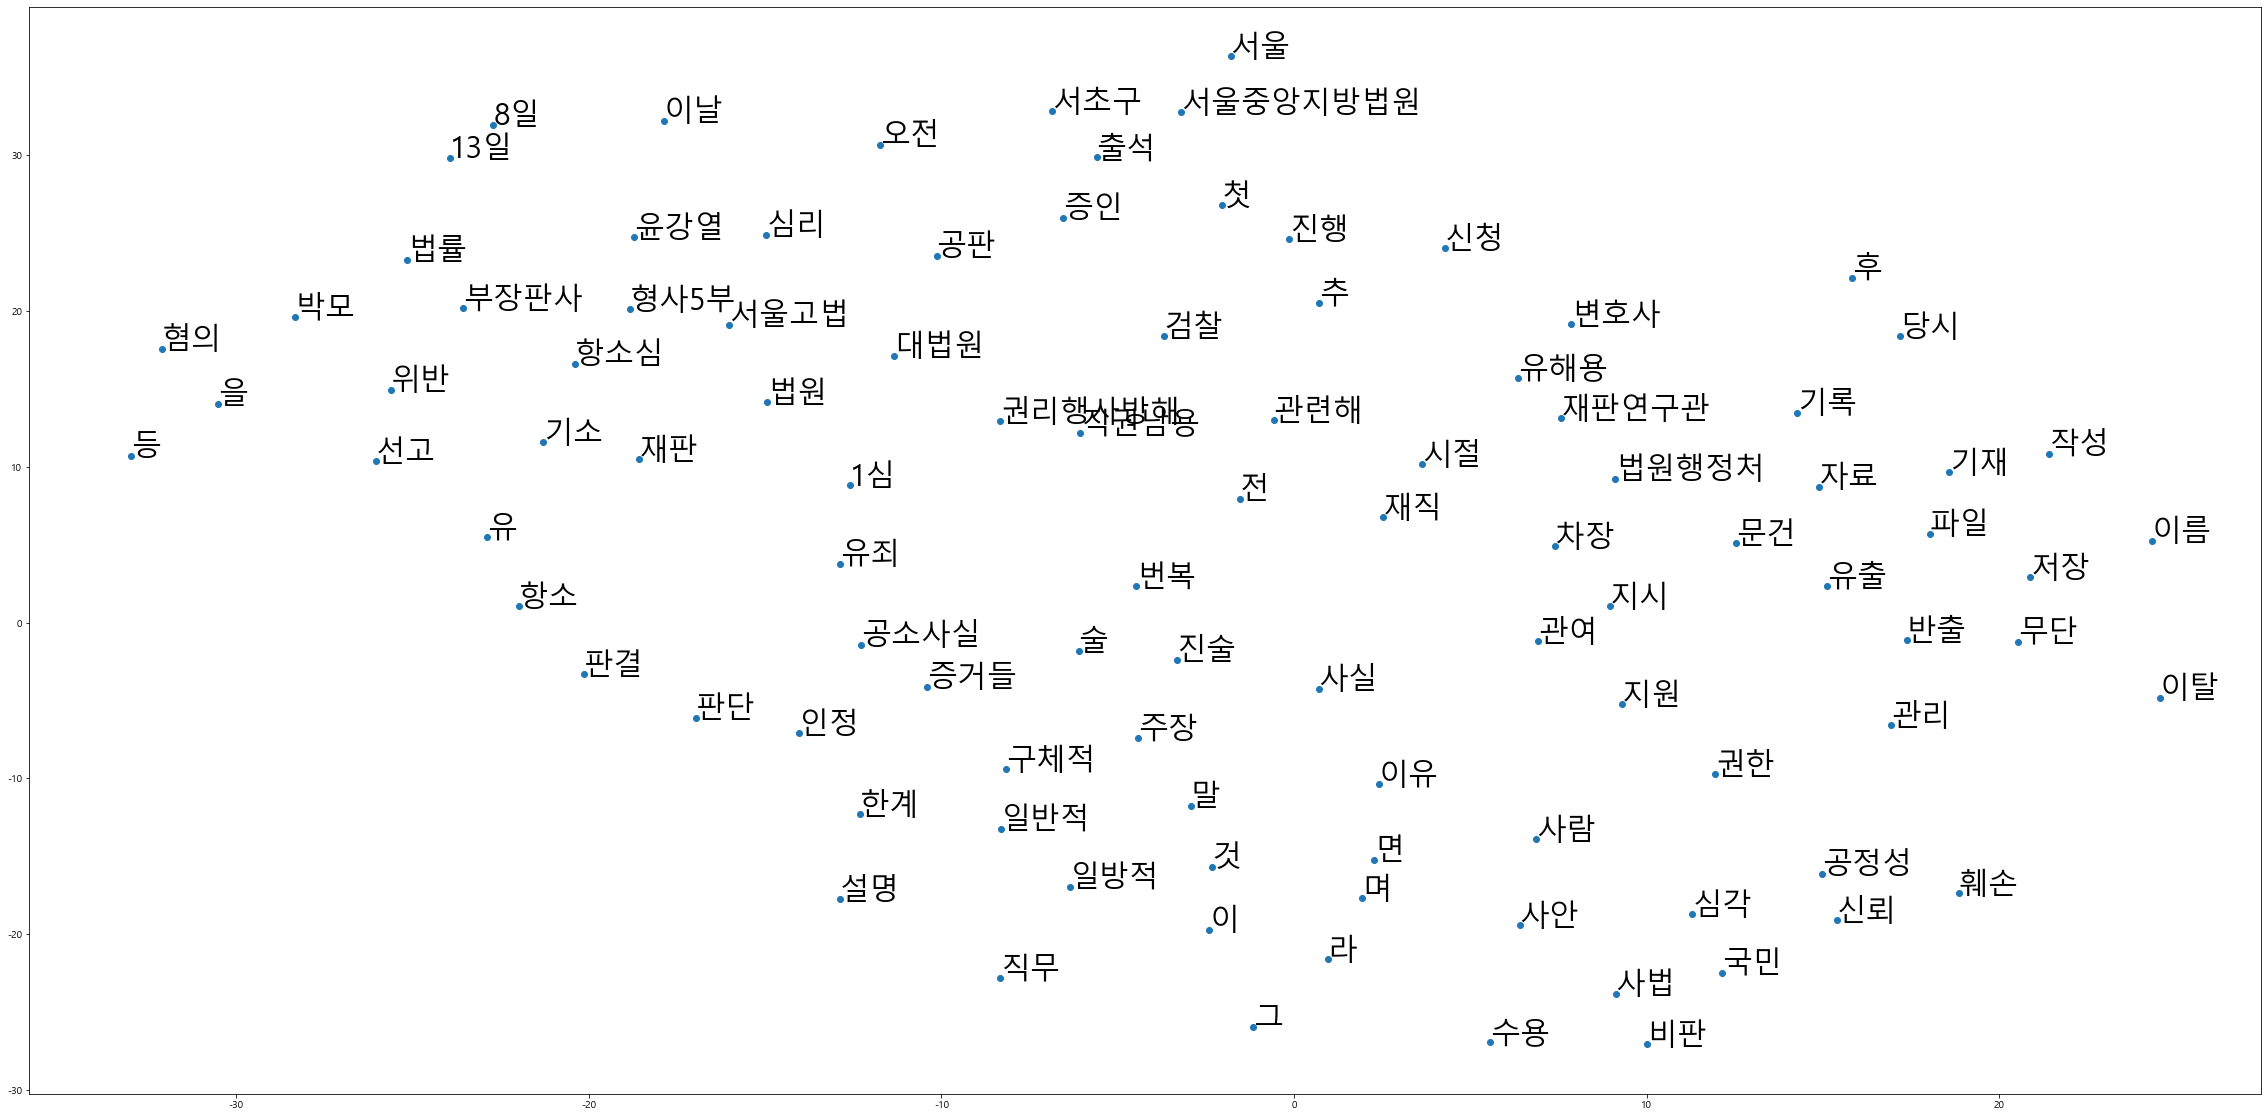

In [114]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize = 30)
plt.show()

word2vec 모델은 각 단어가 벡터로 표현됨<br>
각 기사마다 단어의 개수가 모두 다르기 때문에 입력값을 하나의 형태로 만들어야 함<br>
따라서 문장에 있는 모든 단어의 벡터값에 대해 평균을 내서 기사 하나당 하나의 벡터로 만듦<br>

In [37]:
def GetFeatures(words, model, num_features):
    # 출력 벡터 초기화
    feature_vector = np.zeros((num_features), dtype = np.float32)
    
    num_words = 0
    #어휘사전 준비
    index2word_set = set(model.wv.index2word)
    
    for word in words:
        if word in index2word_set:
            num_words += 1
            # 사전에 해당하는 단어에 대해 단어 벡터 더함
            featrue_vector = np.add(feature_vector, model[word])
    
    # 문장의 단어 수만큼 나누어 단어 벡터의 평균값을 문장 벡터로 함
    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

In [38]:
def GetDataset(texts, model, num_features):
    dataset = list()
    
    for text in texts:
        dataset.append(GetFeatures(text, model, num_features))
    
    reviewFeatureVecs = np.stack(dataset)
    
    return reviewFeatureVecs

In [125]:
test_data_vecs = GetDataset(textWord2v ,model, 300)

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [226]:
test_data_vecs2 = GetDataset(textWord2v ,model, 1000)

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [237]:
test_data_vecs3 = GetDataset(textWord2v ,model, 600)

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [144]:
test_data_vecs.shape

(22618, 300)

In [227]:
test_data_vecs2.shape

(22618, 1000)

In [238]:
test_data_vecs3.shape

(22618, 600)

In [151]:
np.save('Embedding_Word2Vec', test_data_vecs)

In [228]:
np.save('Embedding_Word2Vec2', test_data_vecs2)

In [239]:
np.save('Embedding_Word2Vec3', test_data_vecs3)

In [153]:
tmpNp = np.load('Embedding_Word2Vec.npy')
tmpNp

array([[ 3.5867360e-04, -5.0138919e-05,  5.3707565e-05, ...,
         6.1997212e-05, -1.1131681e-04, -1.4012240e-04],
       [ 1.7403363e-04, -1.5851248e-04,  2.4497812e-04, ...,
        -5.7187409e-04, -3.5311101e-04, -4.1206315e-04],
       [ 6.0614204e-04, -1.3597249e-05, -6.7892281e-05, ...,
        -1.7210764e-04,  8.5235195e-04, -3.9976859e-04],
       ...,
       [ 1.3841122e-03, -1.9348481e-04,  2.0725612e-04, ...,
         2.3924564e-04, -4.2956872e-04, -5.4072874e-04],
       [ 1.0578831e-03,  2.8603131e-04, -4.7779057e-04, ...,
        -2.7115755e-03, -1.0418001e-03,  3.4990159e-03],
       [-3.1465854e-04, -1.9932296e-03,  1.3868761e-03, ...,
         3.9472437e-04, -1.2873940e-04, -6.5633724e-03]], dtype=float32)

In [150]:
test_data_vecs

array([[ 3.5867360e-04, -5.0138919e-05,  5.3707565e-05, ...,
         6.1997212e-05, -1.1131681e-04, -1.4012240e-04],
       [ 1.7403363e-04, -1.5851248e-04,  2.4497812e-04, ...,
        -5.7187409e-04, -3.5311101e-04, -4.1206315e-04],
       [ 6.0614204e-04, -1.3597249e-05, -6.7892281e-05, ...,
        -1.7210764e-04,  8.5235195e-04, -3.9976859e-04],
       ...,
       [ 1.3841122e-03, -1.9348481e-04,  2.0725612e-04, ...,
         2.3924564e-04, -4.2956872e-04, -5.4072874e-04],
       [ 1.0578831e-03,  2.8603131e-04, -4.7779057e-04, ...,
        -2.7115755e-03, -1.0418001e-03,  3.4990159e-03],
       [-3.1465854e-04, -1.9932296e-03,  1.3868761e-03, ...,
         3.9472437e-04, -1.2873940e-04, -6.5633724e-03]], dtype=float32)

In [183]:
preData = pd.read_excel("preprocessing_data_af_rm_kw.xlsx")

In [184]:
preData.head()

,Unnamed: 0,title,date,text,sentence,sentence2,y
0,0,검찰 유해용 사법행정권 이탈해 1심 무죄 작심 비판,2020-10-08,대법원 문건 무단으로 유출 혐의 등 1심 인정증거 범죄고의 없다 검찰 1심 임종헌 ...,무죄,무죄,0
1,1,안태근 무죄 확정 서지현 검사 검찰 변하질 않는구나,2020-10-08,검찰 썩은내 나는 모습 알리기 위해 폭로 변하지 않는 검찰과 세상에 고통스러웠다 후...,무죄,무죄,0
2,2,만취 비정규직 성폭행 은행원 징역형 1심에서는 무죄,2020-10-08,회식 후 술에 취한 비정규직 여직원을 성폭행한 혐의로 재판에 넘겨진 30대 전 은행...,무죄,무죄,0
3,3,4번 재판 끝에 안태근 서지현 불이익 혐의 무죄 확정,2020-10-07,직권남용해 서지현 인사에 불이익 준 혐의 1심 인사 불이익 징역 2심 항소기각 대법...,무죄,무죄,0
4,4,윤한홍 국정농단 사건 재판의 무죄율 일반보다 5배 높아,2020-10-07,1심에서 판결 난 후 항소심 등 열지 않기도 윤한홍 국민의힘 의원이 7일 오후 서울...,무죄,무죄,0


In [185]:
preData.shape

(22618, 7)

# Dataset 분리

In [186]:
X = test_data_vecs
y = np.array(preData['y'])

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [217]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(14475, 5000)
(4524, 5000)
(14475,)
(4524,)
(3619, 5000)
(3619,)


In [187]:
print(X_train.shape)
print(X_train)

(14475, 300)
[[-2.8042975e-04 -4.1986079e-04 -3.7647402e-05 ... -2.5464149e-04
  -2.2019453e-04  2.0437172e-04]
 [ 7.1059685e-04  1.7794922e-04  5.3331518e-04 ...  6.8082678e-05
   3.6876602e-04 -6.3953979e-04]
 [ 2.8688356e-04 -2.6129792e-04  4.0383113e-04 ... -9.4269868e-04
  -5.8208144e-04 -6.7926035e-04]
 ...
 [ 2.6418053e-04 -2.4061966e-04  3.7187326e-04 ... -8.6809660e-04
  -5.3601747e-04 -6.2550593e-04]
 [ 1.2181660e-03  3.0505579e-04  9.1425463e-04 ...  1.1671317e-04
   6.3217030e-04 -1.0963539e-03]
 [ 3.9773944e-04 -8.3595864e-04  3.4605636e-04 ...  6.8828237e-04
  -2.5083064e-06 -5.7987956e-04]]


In [188]:
print(X_test.shape)
print(X_test)

(4524, 300)
[[ 1.27919033e-04  6.07520560e-05  1.45749713e-03 ...  3.97543539e-04
   2.21277995e-04 -1.39281014e-03]
 [-2.44750350e-04 -2.11967330e-04 -6.35059332e-05 ... -4.44201141e-04
  -1.19560900e-04 -8.48519849e-04]
 [ 4.80173912e-04  1.29829816e-04 -2.16869477e-04 ... -1.23078609e-03
  -4.72873828e-04  1.58820581e-03]
 ...
 [ 7.12679175e-04  1.92694773e-04 -3.21879954e-04 ... -1.82674557e-03
  -7.01844285e-04  2.35723169e-03]
 [-3.97303171e-04  1.35483115e-05  1.39478350e-03 ...  1.28490408e-03
  -5.81257511e-04  1.73006265e-04]
 [-8.07155506e-04  6.70586422e-04 -5.38627093e-04 ... -3.99424403e-04
  -1.11370638e-04 -4.02803234e-05]]


In [189]:
print(y_train.shape)
print(y_train)

(14475,)
[0 3 3 ... 3 1 1]


In [190]:
print(y_test.shape)
print(y_test)

(4524,)
[3 1 3 ... 1 3 3]


In [191]:
print(X_val.shape)
print(X_val)

(3619, 300)
[[ 1.9623189e-04 -1.0968477e-03  4.4952400e-04 ...  4.0763529e-04
  -2.6112190e-04 -3.9799328e-04]
 [-3.9715029e-04  3.9340128e-04  3.5139348e-04 ...  4.7896118e-04
  -4.0027010e-04  1.1838484e-03]
 [ 3.6453537e-05  2.0253577e-04 -3.5356171e-04 ... -3.3222916e-06
   9.1735667e-05 -2.2951936e-04]
 ...
 [-1.0149020e-03 -1.6167319e-03 -8.0508756e-04 ...  6.9032679e-04
   2.1944414e-03 -2.0543633e-03]
 [ 3.0877665e-04 -1.7259222e-03  7.0733920e-04 ...  6.4142613e-04
  -4.1088299e-04 -6.2625413e-04]
 [-6.9107547e-05 -2.1357316e-04  1.4188069e-04 ...  1.8073455e-04
   3.6852795e-04 -7.4971694e-04]]


In [192]:
print(y_val.shape)
print(y_val)

(3619,)
[1 1 1 ... 1 1 3]


In [193]:
np.save('X_trainingset', X_train)
np.save('X_testset', X_test)
np.save('X_validationset', X_val)
np.save('y_trainingset', y_train)
np.save('y_testset', y_test)
np.save('y_validationset', y_val)

# features = 1000

In [229]:
X = test_data_vecs2
y = np.array(preData['y'])

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [230]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(14475, 1000)
(4524, 1000)
(14475,)
(4524,)
(3619, 1000)
(3619,)


In [231]:
np.save('X_trainingset3', X_train)
np.save('X_testset3', X_test)
np.save('X_validationset3', X_val)
np.save('y_trainingset3', y_train)
np.save('y_testset3', y_test)
np.save('y_validationset3', y_val)

# features = 600

In [240]:
X = test_data_vecs3
y = np.array(preData['y'])

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [241]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(14475, 600)
(4524, 600)
(14475,)
(4524,)
(3619, 600)
(3619,)


In [242]:
np.save('X_trainingset4', X_train)
np.save('X_testset4', X_test)
np.save('X_validationset4', X_val)
np.save('y_trainingset4', y_train)
np.save('y_testset4', y_test)
np.save('y_validationset4', y_val)

dataset1: word2Vec, features = 300<br>
dataset2: tf-idf<br>
dataset3: word2Vec, features = 1000<br>

# ===============================옮겨서 정리

In [74]:
preData = pd.read_excel('preprocessing_data_af_rm_kw.xlsx', index_col = 0)

In [75]:
preData

,title,date,text,sentence,sentence2
0,검찰 유해용 사법행정권 이탈해 1심 무죄 작심 비판,2020-10-08,대법원 문건 무단으로 유출 혐의 등 1심 인정증거 범죄고의 없다 검찰 1심 임종헌...,무죄,무죄
1,안태근 무죄 확정 서지현 검사 검찰 변하질 않는구나,2020-10-08,검찰 썩은내 나는 모습 알리기 위해 폭로 변하지 않는 검찰과 세상에 고통스러웠다 ...,무죄,무죄
2,만취 비정규직 성폭행 은행원 징역형 1심에서는 무죄,2020-10-08,회식 후 술에 취한 비정규직 여직원을 성폭행한 혐의로 재판에 넘겨진 30대 전 은...,무죄,무죄
3,4번 재판 끝에 안태근 서지현 불이익 혐의 무죄 확정,2020-10-07,직권남용해 서지현 인사에 불이익 준 혐의 1심 인사 불이익 2심 항소기각 대법 취...,무죄,무죄
4,윤한홍 국정농단 사건 재판의 무죄율 일반보다 5배 높아,2020-10-07,1심에서 판결 난 후 항소심 등 열지 않기도 윤한홍 국민의힘 의원이 7일 오후 ...,무죄,무죄
...,...,...,...,...,...
90136,사노맹 간부에 무기징역 구형 서울지검,NaN,서울지검 공안1부 이상형검사는 28일 남한사회주의 노동자동맹 사노맹 사건으로 구속기...,무기징역,NaN
90137,고소취하된 강간범 4명 특가법 첫 적용 기소,NaN,서울지검 남부지청피해자와 합의해 고소가 취하된 단순강간범에게 검찰이 지난 신설된...,무기징역,NaN
90138,집권 후반기 화합차원서 은전 노대통령 취임 3주년 특사의 의미,NaN,일반 형사범 행형성적 고려 선별구제 가정파괴범 일벌백계 로 대상서 제외법무부가 2...,무기징역,NaN
90139,청부살인 연예계 대부 구속,NaN,삼호기획 대표 공범 4명에 도피자금 주고 주류도매상 살해교사서울지검 강력부 강신욱...,무기징역,NaN


C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


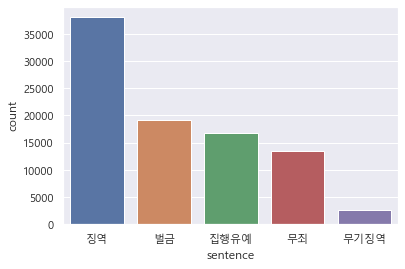

In [80]:
sns.set(font = 'Malgun Gothic', rc = {'axes.unicode_minus':False})    # 한글 폰트 설정
sns.countplot(preData["sentence"], order = preData["sentence"].value_counts().index)
plt.show()

In [76]:
sentences = []
for sentence in preData['sentence']:
    if sentence == '징역':
        sentences.append('징역/무기징역')
    elif sentence == '무기징역':
        sentences.append('징역/무기징역')
    else:
        sentences.append('무죄/벌금/집행유예')
print(len(preData['sentence']))
print(len(sentences))

90141
90141


In [77]:
preData['sentence3'] = sentences

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


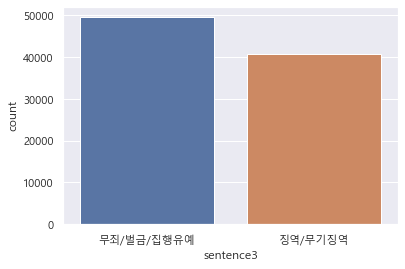

In [79]:
sns.set(font = 'Malgun Gothic', rc = {'axes.unicode_minus':False})    # 한글 폰트 설정
sns.countplot(preData["sentence3"], order = preData["sentence3"].value_counts().index)
plt.show()

In [83]:
preData.to_excel('preprocessing_data_af_rm_kw.xlsx')

In [84]:
# save np.load
np_load_old = partial(np.load)

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [ ]:
# restore np.load for future normal usage
np.load = np_load_old

In [86]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')

In [89]:
print(X_train.shape)

()


In [90]:
data = pd.read_excel('tokenization.xlsx')
text = data['Hannanum'].copy()

In [91]:
preData =pd.read_excel('preprocessing_data_af_rm_kw.xlsx')
sentences = preData['sentence3']

KeyboardInterrupt: 

In [ ]:
for i, t in enumerate(text):
    text[i] = str(t)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 5000)
X = tfidf_vectorizer.fit_transform(text)

In [ ]:
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [ ]:
type(X_train)